# International Roughness Index (IRI) calculation data

https://gisportal.binamarga.pu.go.id/arcgis/rest/services/ maybe lisenced

In [7]:
# Import necessary modules
import geopandas as gpd

# Set filepath
fp = "/home/aulia/Documents/python/netCDF python/Plotting CAMS nitrogen dioxide products/Python-IRI/Centerline_IRI_2019_2_20200518.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

Let’s see check the data type of it

In [8]:
type(data)

geopandas.geodataframe.GeoDataFrame

Let’s take a look at our data and print the first 2 rows using the head() -function:

In [9]:
print(data.head(2))

  LINKID  STA_FROM_D  STA_TO_DAM  MAX_IRI  MEAN_IRI  MAX_IRI_PO  MEAN_IRI_P  \
0  01001           0          10     3.91      3.66        3.91        3.66   
1  01001          10          20     3.93      3.60        3.93        3.60   

    SHAPE_LEN                             NM_RUAS  \
0  100.000023  KRUENG RAYA - BTS. KOTA BANDA ACEH   
1  100.000014  KRUENG RAYA - BTS. KOTA BANDA ACEH   

                                            geometry  
0  LINESTRING Z (-2191395.741 602207.111 -0.000, ...  
1  LINESTRING Z (-2191306.982 602252.328 -0.000, ...  


Let’s try it out, and take a look how our data looks like on a map:

<AxesSubplot:>

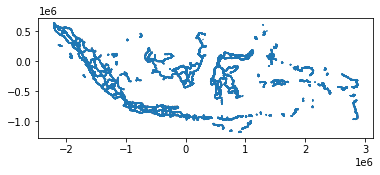

In [10]:
%matplotlib inline
data.plot()

In [11]:
# Check the coordinate reference system
data.crs

<Derived Projected CRS: PROJCS["Indonesia Lambert Conformal Conic",GEOGCS[ ...>
Name: Indonesia Lambert Conformal Conic
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

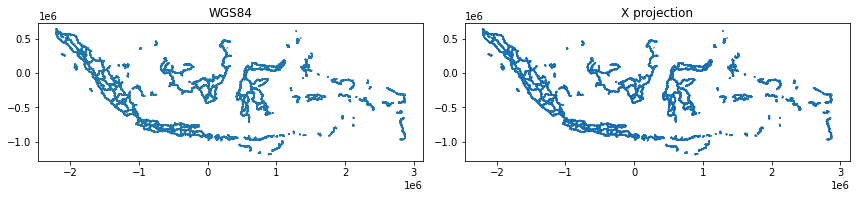

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
data.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with X projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("X projection");

# Remove empty white space around the plot
plt.tight_layout()